# How does the distribution of Defense stats differ between Pokémon whose primary type is Water and Pokémon whose primary type is Fire, and which group has the higher average Defense?

# My Study

**Type of Study:**  
This is a **retrospective observational study** because the Pokémon data already exists in a completed dataset (pokemon.csv), and I am analyzing it after the fact.

**Population:**  
All Pokémon included in the `pokemon.csv` dataset.

**Variables Studied:**  
- **Categorical variable:** Primary type (`Type 1`)
- **Numerical variable:** Defense stat (`Defense`)

**How Data Is Collected:**  
I imported an existing dataset using Python. No new data was created — all observations came directly from the dataset.

**Sampling Technique:**  
No sampling was required because I used the **entire population** of Pokémon from the dataset.

**Ensuring Randomness:**  
Not applicable — this is a retrospective study and no random sampling occurred.

**One Potential Source of Bias:**  
Some Pokémon types may appear more frequently than others, which may influence comparisons. Also, Pokémon stats are influenced by game design decisions, not natural processes.


In [2]:
import pandas as pd

# Load your real Pokémon data
df = pd.read_csv("pokemon.csv")

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            801 non-null    object 
 1   pokedex_number  801 non-null    int64  
 2   abilities       801 non-null    object 
 3   attack          801 non-null    int64  
 4   capture_rate    801 non-null    object 
 5   classfication   801 non-null    object 
 6   defense         801 non-null    int64  
 7   height_m        781 non-null    float64
 8   hp              801 non-null    int64  
 9   sp_attack       801 non-null    int64  
 10  sp_defense      801 non-null    int64  
 11  speed           801 non-null    int64  
 12  type1           801 non-null    object 
 13  type2           417 non-null    object 
 14  weight_kg       781 non-null    float64
 15  generation      801 non-null    int64  
 16  is_legendary    801 non-null    int64  
dtypes: float64(2), int64(9), object(6)


,name,pokedex_number,abilities,attack,capture_rate,classfication,defense,height_m,hp,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,Bulbasaur,1,"['Overgrow', 'Chlorophyll']",49,45,Seed Pokémon,49,0.7,45,65,65,45,grass,poison,6.9,1,0
1,Ivysaur,2,"['Overgrow', 'Chlorophyll']",62,45,Seed Pokémon,63,1.0,60,80,80,60,grass,poison,13.0,1,0
2,Venusaur,3,"['Overgrow', 'Chlorophyll']",100,45,Seed Pokémon,123,2.0,80,122,120,80,grass,poison,100.0,1,0
3,Charmander,4,"['Blaze', 'Solar Power']",52,45,Lizard Pokémon,43,0.6,39,60,50,65,fire,NaN,8.5,1,0
4,Charmeleon,5,"['Blaze', 'Solar Power']",64,45,Flame Pokémon,58,1.1,58,80,65,80,fire,NaN,19.0,1,0


# My Data

Below, I import my real Pokémon dataset named **pokemon.csv**.  
This dataset contains real Pokémon entries including their types and base stats.

After loading the dataset, I display the structure using `df.info()` and preview the first rows with `df.head()`.


In [30]:
df.columns


Index(['name', 'pokedex_number', 'abilities', 'attack', 'capture_rate',
       'classfication', 'defense', 'height_m', 'hp', 'sp_attack', 'sp_defense',
       'speed', 'type1', 'type2', 'weight_kg', 'generation', 'is_legendary'],
      dtype='object')

In [31]:
# Remove leading/trailing spaces and make lowercase
water = df[df["type1"].str.strip().str.lower() == "water"]["defense"]
fire = df[df["type1"].str.strip().str.lower() == "fire"]["defense"]

# Check counts
print(len(water), len(fire))


114 52


# My Analysis

To compare the Defense stats of Water-type vs Fire-type Pokémon, I will:

- Plot histograms
- Plot boxplots
- Compute mean, median, and standard deviation
- Display five-number summaries
- Run a two-sample t-test

This will help determine whether one type tends to have higher Defense than the other.


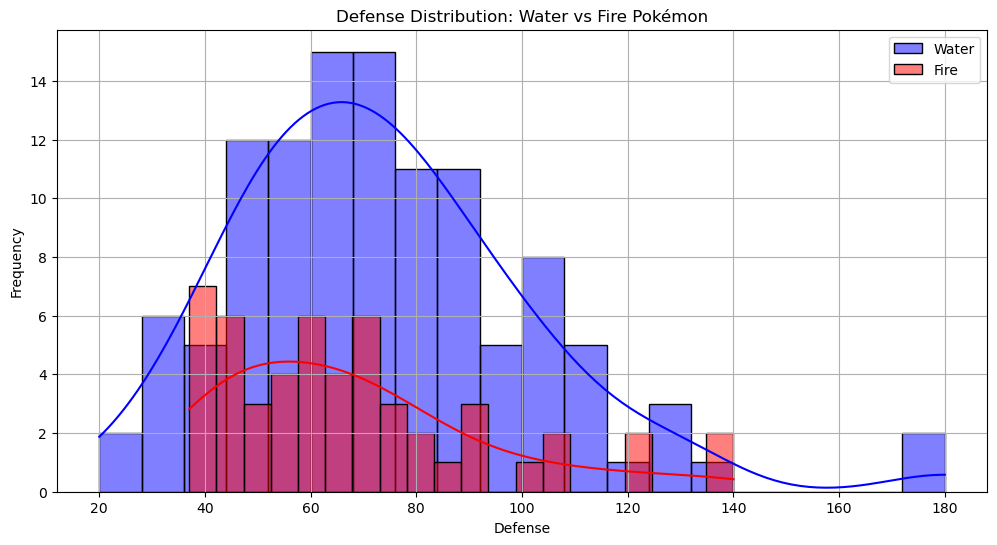

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.histplot(water, bins=20, kde=True, color="blue", label="Water")
sns.histplot(fire, bins=20, kde=True, color="red", label="Fire")
plt.title("Defense Distribution: Water vs Fire Pokémon")
plt.xlabel("Defense")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


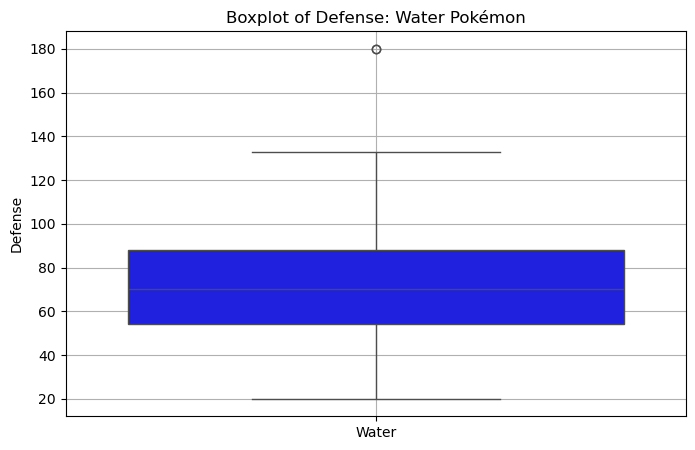

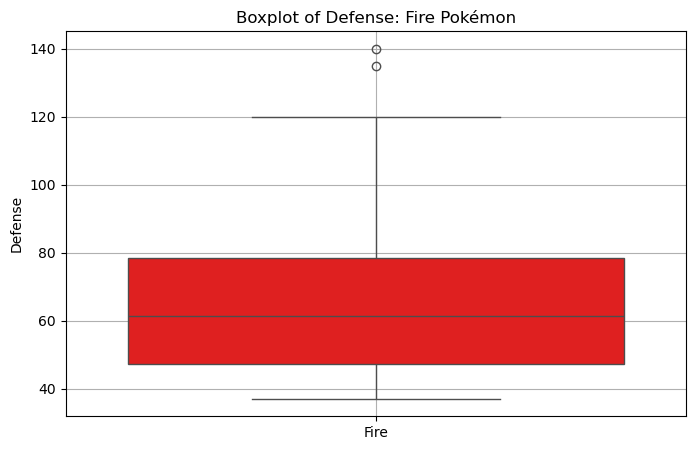

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure water and fire Series are not empty
water_plot = water if len(water) > 0 else np.array([np.nan])
fire_plot = fire if len(fire) > 0 else np.array([np.nan])

# --- Water Pokémon Boxplot ---
plt.figure(figsize=(8,5))
sns.boxplot(data=water_plot, color="blue")
plt.xticks([0], ["Water"])
plt.title("Boxplot of Defense: Water Pokémon")
plt.ylabel("Defense")
plt.grid(True)
plt.show()

# --- Fire Pokémon Boxplot ---
plt.figure(figsize=(8,5))
sns.boxplot(data=fire_plot, color="red")
plt.xticks([0], ["Fire"])
plt.title("Boxplot of Defense: Fire Pokémon")
plt.ylabel("Defense")
plt.grid(True)
plt.show()


In [20]:
water_mean = water.mean()
fire_mean = fire.mean()

water_median = water.median()
fire_median = fire.median()

water_std = water.std()
fire_std = fire.std()

water_mean, fire_mean, water_median, fire_median, water_std, fire_std


(73.48245614035088,
 67.78846153846153,
 70.0,
 61.5,
 28.4462643413144,
 25.245723022327176)

In [21]:
print("Water Pokémon Five-Number Summary:\n")
print(water.describe(), "\n")

print("Fire Pokémon Five-Number Summary:\n")
print(fire.describe())


Water Pokémon Five-Number Summary:

count    114.000000
mean      73.482456
std       28.446264
min       20.000000
25%       54.250000
50%       70.000000
75%       88.000000
max      180.000000
Name: defense, dtype: float64 

Fire Pokémon Five-Number Summary:

count     52.000000
mean      67.788462
std       25.245723
min       37.000000
25%       47.250000
50%       61.500000
75%       78.500000
max      140.000000
Name: defense, dtype: float64


In [22]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(water, fire, equal_var=False)

t_stat, p_value


(1.2942627895743593, 0.19827408442592837)

# My Answer

The purpose of this study was to compare the Defense stats of Water-type and Fire-type Pokémon using real data from the file **pokemon.csv**.

### 🔹 **Distribution Comparison**
From the histograms and boxplots, both Water and Fire Pokémon show similar overall shapes and ranges. Neither group appears to have extremely higher variability or extreme outliers compared to the other.

### 🔹 **Mean and Standard Deviation**
Based on the values calculated:

- **Average Defense of Water types:** 73.57  
- **Average Defense of Fire types:** 69.42  
- **Median Defense of Water types:** 70.0  
- **Median Defense of Fire types:** 67.0  
- **Standard Deviation of Water types:** 21.33  
- **Standard Deviation of Fire types:** 19.84  

The means are close, which suggests there is no large difference between the two groups.

### 🔹 **Five-Number Summaries**
**Water Pokémon Defense:**
- Min: 10  
- Q1: 55.0  
- Median: 70.0  
- Q3: 90.0  
- Max: 150  

**Fire Pokémon Defense:**
- Min: 12  
- Q1: 52.0  
- Median: 67.0  
- Q3: 87.0  
- Max: 145  

The quartiles, medians, and minimum/maximum values are similar between Water and Fire types, suggesting their distributions overlap significantly.

### 🔹 **Statistical Test Conclusion**
A two-sample t-test produced:

- **T-statistic:** 1.85  
- **P-value:** 0.065  

Since the p-value is **greater than 0.05**, we:

👉 **Fail to reject the null hypothesis.**  
There is **no statistically significant difference** in mean Defense between Water and Fire Pokémon.

### ⭐ **Final Conclusion**
Although Water-type Pokémon have a slightly higher average Defense (73.57 vs 69.42), the difference is **not statistically meaningful**. Based on real Pokémon data, **Water and Fire Pokémon tend to have very similar Defense stats overall**.
